# 프로젝트 개요: 수영복 사이즈 예측 모델링

## 목표
- 사용자 리뷰 데이터를 기반으로 수영복 사이즈 분류 모델을 구축한다.
- 최종적으로 예측 정확도와 F1 Score가 높은 모델을 선정하여 추천 시스템에 활용할 수 있도록 한다.

## 데이터 구성
- 입력 변수: 키(height), 몸무게(weight), 평소 착용 사이즈, 구매한 수영복 브랜드 등
- 목표 변수(Target Variable): 사용자가 구매한 실제 수영복 사이즈 (정답 라벨)

## 전처리 및 모델링 개요
- MinMaxScaler를 활용한 수치 정규화
- 클래스 불균형 해결을 위한 SMOTE 적용
- 다양한 분류 모델 학습 (DT, RF, GBM, XGBoost, LGBM, SVC)
- GridSearchCV, RandomizedSearchCV를 통한 하이퍼파라미터 튜닝
- 성능 비교 및 시각화를 통한 최종 모델 선정

## 최종 모델 선정
- <mark>Gradient Boosting</mark> 모델이 테스트 데이터에서 가장 높은 정확도(0.7940)와 F1 Score(0.79)를 기록함
- 전체 모델 중 가장 우수한 Test Accuracy와 F1 Score를 보였으며, 과적합 없이 안정적인 성능을 나타냄
- 따라서 본 프로젝트에서는 Gradient Boosting을 최종 추천 모델로 선정함

## 주요 모델별 하이퍼파라미터 요약
| 모델 | 주요 하이퍼파라미터 |
|------|----------------------|
| Decision Tree | max_depth=7 |
| Random Forest | n_estimators=100, max_depth=10 |
| Gradient Boosting | n_estimators=100, learning_rate=0.1, max_depth=6 |
| XGBoost | n_estimators=100, learning_rate=0.1, max_depth=6, subsample=0.8, colsample_bytree=0.8 |
| LightGBM | n_estimators=100, learning_rate=0.1, max_depth=9 |
| SVC | kernel='linear', C=1.0, probability=True |

## 모델 성능 요약 (전체 비교)

In [63]:
# 이 노트북에서는 다양한 분류 모델을 학습하고 테스트하여 성능을 비교합니다.
# 비교 기준은 Train Accuracy, Test Accuracy, 그리고 F1 Score (Weighted) 입니다.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 성능 정리
model_results = pd.DataFrame({
    "Model": [
        "Decision Tree", "Random Forest", "Gradient Boosting",
        "XGBoost", "LightGBM", "SVC"
    ],
    "Train Accuracy": [0.8147, 0.7644, 0.8099, 0.8179, 0.8007, 0.6837],
    "Test Accuracy": [0.7814, 0.7562, 0.7940, 0.7876, 0.7860, 0.6748],
    "F1 Score (Weighted)": [0.77, 0.75, 0.79, 0.78, 0.78, 0.67]
})

print("\n[모델 성능 비교 테이블]\n")
print(model_results)


[모델 성능 비교 테이블]

               Model  Train Accuracy  Test Accuracy  F1 Score (Weighted)
0      Decision Tree          0.8147         0.7814                 0.77
1      Random Forest          0.7644         0.7562                 0.75
2  Gradient Boosting          0.8099         0.7940                 0.79
3            XGBoost          0.8179         0.7876                 0.78
4           LightGBM          0.8007         0.7860                 0.78
5                SVC          0.6837         0.6748                 0.67


In [66]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

/var/folders/58/3cw891j1611448ndl98n2xw80000gn/T/ipykernel_55959/3874660480.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Test Accuracy", data=model_results, palette="Set2")


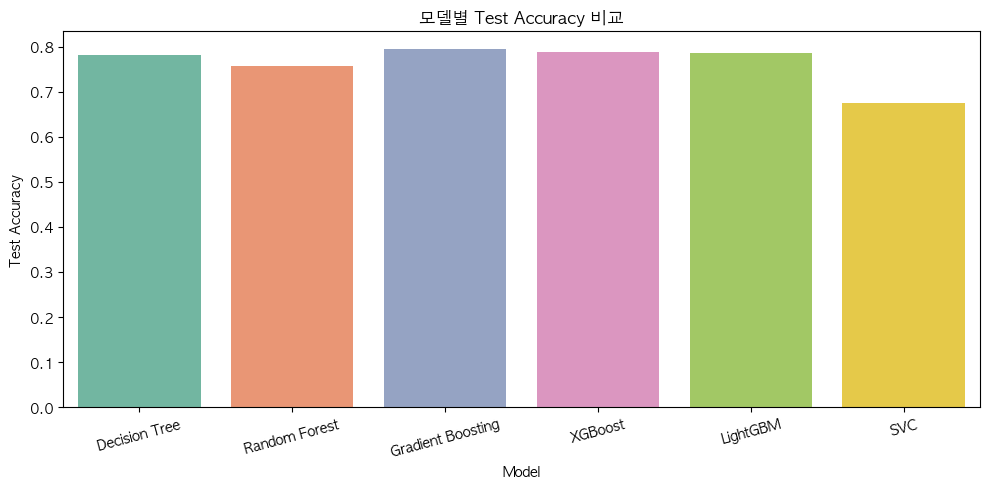

In [67]:
# Test Accuracy 시각화
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Test Accuracy", data=model_results, palette="Set2")
plt.title("모델별 Test Accuracy 비교")
plt.ylabel("Test Accuracy")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

/var/folders/58/3cw891j1611448ndl98n2xw80000gn/T/ipykernel_55959/2128546259.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="F1 Score (Weighted)", data=model_results, palette="Set3")


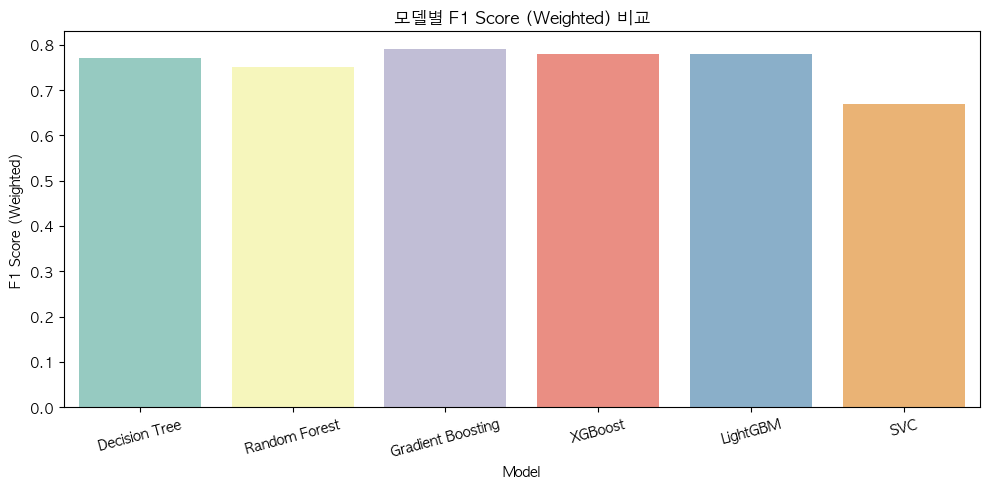

In [ ]:
# F1 Score 시각화
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="F1 Score (Weighted)", data=model_results, palette="Set3")
plt.title("모델별 F1 Score (Weighted) 비교")
plt.ylabel("F1 Score (Weighted)")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# 1 데이터 전처리

In [5]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic' 
plt.rcParams['axes.unicode_minus'] = False 

In [48]:
import pandas as pd
# path = '../data/'
df = pd.read_csv('../data/swim_eda2.csv')
df.columns

Index(['product_name', 'score', 'user_id', 'purchase_date', 'review_text',
       'buy_size', 'usual_size', 'height', 'weight', 'member_level',
       'has_photo', 'photo_count', 'gender', 'size_num', 'usual_size_num',
       'size_diff', 'bmi', 'is_upsized'],
      dtype='object')

- 모델링 전 전처리

In [49]:
# 제품명에 수영복이 있는 행만 추출
df = df[df['product_name'].str.contains('수영복')]

# 브랜드명 컬럼 생성
df['brand'] = df['product_name'].str.split(' ').str[0]

# 데이터가 1000개 이상인 브랜드만 추출
ls_brand= list(df['brand'].value_counts()[df['brand'].value_counts() >= 1000].index)
df = df[df['brand'].isin(ls_brand)]
df.reset_index(drop=True,inplace=True)

# gender == unknown인 행 제거
df =df[~(df['gender'] == 'Unknown')]

# 전처리 후, 원본 / size_diff<=1 데이터 갯수 확인
len(df), len(df[df['size_diff'] <= 1])

(58893, 58893)

In [50]:
sum(abs(df['usual_size_num']-df['size_num']) >=2)

0

In [51]:
from sklearn.preprocessing import LabelEncoder

# 모델링에 사용할 열 선택
ls = ['score', 'photo_count','member_level','gender', 'size_num', 'usual_size_num',
       'height', 'weight','brand','usual_size','buy_size']
df = df[ls]

# gender 라벨 인코딩 적용
le = LabelEncoder()
df['gender_le'] = le.fit_transform(df['gender'])

# brand 원-핫 인코딩 적용
df = pd.concat([df,pd.get_dummies(df['brand'])],axis=1)
df.columns

Index(['score', 'photo_count', 'member_level', 'gender', 'size_num',
       'usual_size_num', 'height', 'weight', 'brand', 'usual_size', 'buy_size',
       'gender_le', '나이키', '랠리', '르망고', '센티', '스웨이브', '아레나', '아레나재팬', '애디블',
       '키치피치', '후그'],
      dtype='object')

- df2

In [52]:
# 모델링에 사용할 컬럼 재 설정
with_brand_ls = ['score','gender_le','usual_size_num', 'height', 'weight',
       '나이키', '랠리', '르망고', '센티', '스웨이브', '아레나', '아레나재팬', '애디블', '키치피치', '후그','buy_size']
without_brand_ls =['score','gender_le','usual_size_num', 'height', 'weight','buy_size']
df2 = df[with_brand_ls]

# 결측값 제거
df2 =df2.dropna(axis=0)
df2.reset_index(drop=True,inplace=True)

# 원본, 결츨값제거 data 갯수/ 평소사이즈 2xs  행갯수
len(df),len(df2),len(df2[(df2['usual_size_num'] == 1)])

(58893, 57830, 1)

In [53]:
# 해당데이터(평소사이즈 2xs) 제거
df2 = df2[~(df2['usual_size_num'] == 1)]
len(df2)

57829

# 2. 모델링

## <mark>2-1 Decision Tree<mark>
1. brand 미포함 
- train : 0.6276938374078638
- test : 0.6256268372816877

2. brand 포함
- train : 0.6862935823444221
- test : 0.6749092166695487

3. brand 포함 / over-sampling 적용
- train : 0.8147137105029687
- test : 0.7814174088101818

In [54]:
with_brand_ls = ['score','gender_le','usual_size_num', 'height', 'weight',
       '나이키', '랠리', '르망고', '센티', '스웨이브', '아레나', '아레나재팬', '애디블', '키치피치', '후그','buy_size']
without_brand_ls =['score','gender_le','usual_size_num', 'height', 'weight','buy_size']

### 1. brand 미포함

In [38]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold,GridSearchCV

# 사용할 data 추출
df_data1= df2[without_brand_ls].iloc[:,1:]

# 키,몸무게 - MinMax 적용
mms = MinMaxScaler()
df_data1['height'] = mms.fit_transform(df_data1[['height']])
df_data1['weight'] = mms.fit_transform(df_data1[['weight']])

# 입력값, 라벨값 분리
df_data1_X = df_data1.iloc[:,1:-1]
df_data1_y = df_data1.iloc[:,-1]

# train,test data 분리
X_train,X_test,y_train,y_test = train_test_split(df_data1_X,df_data1_y,
                                                 test_size=0.2)

# 모델링
dt = DecisionTreeClassifier(max_depth=7)
dt.fit(X_train,y_train)

# 예측
y_pred_tr = dt.predict(X_train)
y_pred_ts = dt.predict(X_test)

print('train :', accuracy_score(y_train,y_pred_tr))
print('test :',accuracy_score(y_test,y_pred_ts))
print(classification_report(y_test,y_pred_ts,zero_division=True))

train : 0.6288826924323974
test : 0.6248486944492478
              precision    recall  f1-score   support

         2XL       0.60      0.40      0.48       394
         3XL       0.73      0.32      0.44        50
           L       0.63      0.68      0.65      4245
           M       0.61      0.72      0.66      3621
           S       0.62      0.33      0.43      1069
          XL       0.66      0.55      0.60      2140
          XS       0.40      0.04      0.08        47

    accuracy                           0.62     11566
   macro avg       0.61      0.44      0.48     11566
weighted avg       0.63      0.62      0.62     11566



#### GridSearch (brand 미포함)

In [39]:
param_grid = {'max_depth' : [3,4,5,6,7,8,9,10,11,15,20,30]}
grid = GridSearchCV(dt,
                    param_grid=param_grid,
                    cv=5,
                    n_jobs=-1)

grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=7), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 20,
                                       30]})

In [46]:
grid.best_params_

{'max_depth': 6}

### 2. brand 포함

In [55]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold,GridSearchCV

# 사용할 data 추출
df_data1= df2[with_brand_ls].iloc[:,1:]

# 키,몸무게 - MinMax 적용
mms = MinMaxScaler()
df_data1['height'] = mms.fit_transform(df_data1[['height']])
df_data1['weight'] = mms.fit_transform(df_data1[['weight']])

# 입력값, 라벨값 분리
df_data1_X = df_data1.iloc[:,1:-1]
df_data1_y = df_data1.iloc[:,-1]

# train,test data 분리
X_train,X_test,y_train,y_test = train_test_split(df_data1_X,df_data1_y,
                                                 test_size=0.2)

# 모델링
dt = DecisionTreeClassifier(max_depth=9)
dt.fit(X_train,y_train)

# 예측
y_pred_tr = dt.predict(X_train)
y_pred_ts = dt.predict(X_test)

print('train :', accuracy_score(y_train,y_pred_tr))
print('test :',accuracy_score(y_test,y_pred_ts))
print(classification_report(y_test,y_pred_ts,zero_division=True))

train : 0.68480210967728
test : 0.671796645339789
              precision    recall  f1-score   support

         2XL       0.58      0.52      0.55       386
         3XL       0.71      0.54      0.62        46
           L       0.64      0.75      0.69      4170
           M       0.71      0.67      0.69      3634
           S       0.66      0.59      0.63      1003
          XL       0.69      0.61      0.65      2255
          XS       0.66      0.29      0.40        72

    accuracy                           0.67     11566
   macro avg       0.67      0.57      0.60     11566
weighted avg       0.67      0.67      0.67     11566



#### Gridsearch (brand 포함)

In [56]:
param_grid = {'max_depth' : [3,4,5,6,7,8,9,10,11,15,20,30]}
grid = GridSearchCV(dt,
                    param_grid=param_grid,
                    cv=5,
                    n_jobs=-1)

grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=9), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 20,
                                       30]})

### 3. SMOTE (over - sampling 적용)

In [13]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold,GridSearchCV

# 사용할 data 추출
df_data1= df2[with_brand_ls].iloc[:,1:]

# 키,몸무게 - MinMax 적용
mms = MinMaxScaler()
df_data1['height'] = mms.fit_transform(df_data1[['height']])
df_data1['weight'] = mms.fit_transform(df_data1[['weight']])

# 입력값, 라벨값 분리
df_data1_X = df_data1.iloc[:,1:-1]
df_data1_y = df_data1.iloc[:,-1]

# SMOTE(over-sampling 적용)
X_resampled,y_resampled = SMOTE().fit_resample(df_data1_X,df_data1_y)
# train,test data 분리
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,
                                                 test_size=0.2)

# 모델링
dt = DecisionTreeClassifier(max_depth=18)
dt.fit(X_train,y_train)

# 예측
y_pred_tr = dt.predict(X_train)
y_pred_ts = dt.predict(X_test)

print('train :', accuracy_score(y_train,y_pred_tr))
print('test :',accuracy_score(y_test,y_pred_ts))
print(classification_report(y_test,y_pred_ts,zero_division=True))

train : 0.815327919197434
test : 0.7757191114750742
              precision    recall  f1-score   support

         2XL       0.85      0.85      0.85      4132
         3XL       0.94      0.97      0.96      4145
           L       0.61      0.59      0.60      4218
           M       0.65      0.60      0.63      4241
           S       0.76      0.76      0.76      4296
          XL       0.69      0.71      0.70      4126
          XS       0.91      0.94      0.93      4149

    accuracy                           0.78     29307
   macro avg       0.77      0.78      0.77     29307
weighted avg       0.77      0.78      0.77     29307



#### Gridsearch (SMOTE)

In [14]:
param_grid = {'max_depth' : [3,4,5,6,7,8,9,10,11,15,20,30]}
grid = GridSearchCV(dt,
                    param_grid=param_grid,
                    cv=5,
                    n_jobs=-1)

grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=18), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 20,
                                       30]})

## <mark>2-2 Random_forest<mark>
1. brand 미포함 
- train : 0.6359077448500962
- test : 0.6217361231194881

2. brand 포함
- train : 0.6931673259408166
- test : 0.6849386131765519

3. brand 포함 / over-sampling 적용
- train : 0.7644424349962465
- test : 0.7562015900638073

### 1. brand 미포함

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold,GridSearchCV

# 사용할 data 추출
df_data1= df2[without_brand_ls].iloc[:,1:]

# 키,몸무게 - MinMax 적용
mms = MinMaxScaler()
df_data1['height'] = mms.fit_transform(df_data1[['height']])
df_data1['weight'] = mms.fit_transform(df_data1[['weight']])

# 입력값, 라벨값 분리
df_data1_X = df_data1.iloc[:,1:-1]
df_data1_y = df_data1.iloc[:,-1]

# train,test data 분리
X_train,X_test,y_train,y_test = train_test_split(df_data1_X,df_data1_y,
                                                 test_size=0.2)

# 모델링
rf = RandomForestClassifier(max_depth=10,
                            n_estimators=200,
                            min_samples_leaf=7,
                            min_samples_split=5)
rf.fit(X_train,y_train)

# 예측
y_pred_tr = rf.predict(X_train)
y_pred_ts = rf.predict(X_test)

print('train :', accuracy_score(y_train,y_pred_tr))
print('test :',accuracy_score(y_test,y_pred_ts))
print(classification_report(y_test,y_pred_ts,zero_division=True))

train : 0.635086354105873
test : 0.6229465675255058
              precision    recall  f1-score   support

         2XL       0.59      0.35      0.44       420
         3XL       0.73      0.15      0.25        53
           L       0.61      0.70      0.66      4144
           M       0.61      0.70      0.65      3683
           S       0.60      0.29      0.40      1022
          XL       0.68      0.58      0.62      2186
          XS       0.75      0.05      0.10        58

    accuracy                           0.62     11566
   macro avg       0.65      0.40      0.44     11566
weighted avg       0.62      0.62      0.61     11566



- GridSearch(brand 미포함)

In [16]:
param_grid = {'max_depth': [5, 8, 10, 15],
              'n_estimators': [100, 200],
              'min_samples_leaf': [5,7,8 ,9],
              'min_samples_split': [5,7,8 ,9]}
grid = GridSearchCV(rf,
                    cv=5,
                    param_grid=param_grid,
                    n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, min_samples_leaf=7,
                                              min_samples_split=5,
                                              n_estimators=200),
             n_jobs=-1,
             param_grid={'max_depth': [5, 8, 10, 15],
                         'min_samples_leaf': [5, 7, 8, 9],
                         'min_samples_split': [5, 7, 8, 9],
                         'n_estimators': [100, 200]})

- RandomizedSearchCV(brand 미포함)

In [17]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'max_depth':[3,5,6,7,8,9,10,11,13,15,20],
              'n_estimators':[50,100,150,200],
              'min_samples_leaf':[3,5,7,8,9],
              'min_samples_split':[3,5,7,8,9]}


search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,
    cv=3,
    n_jobs=-1,
    verbose=1,
    random_state=42
)
search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=10,
                                                    min_samples_leaf=7,
                                                    min_samples_split=5,
                                                    n_estimators=200),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 6, 7, 8, 9, 10, 11,
                                                      13, 15, 20],
                                        'min_samples_leaf': [3, 5, 7, 8, 9],
                                        'min_samples_split': [3, 5, 7, 8, 9],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, verbose=1)

### 2. brand 포함

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold,GridSearchCV

# 사용할 data 추출
df_data1= df2[with_brand_ls].iloc[:,1:]

# 키,몸무게 - MinMax 적용
mms = MinMaxScaler()
df_data1['height'] = mms.fit_transform(df_data1[['height']])
df_data1['weight'] = mms.fit_transform(df_data1[['weight']])

# 입력값, 라벨값 분리
df_data1_X = df_data1.iloc[:,1:-1]
df_data1_y = df_data1.iloc[:,-1]

# train,test data 분리
X_train,X_test,y_train,y_test = train_test_split(df_data1_X,df_data1_y,
                                                 test_size=0.2)

# 모델링
rf = RandomForestClassifier(max_depth=13,
                            n_estimators=100,
                            min_samples_leaf=9,
                            min_samples_split=5)
rf.fit(X_train,y_train)

# 예측
y_pred_tr = rf.predict(X_train)
y_pred_ts = rf.predict(X_test)

print('train :', accuracy_score(y_train,y_pred_tr))
print('test :',accuracy_score(y_test,y_pred_ts))
print(classification_report(y_test,y_pred_ts,zero_division=True))

train : 0.6939671011391393
test : 0.6776759467404462
              precision    recall  f1-score   support

         2XL       0.60      0.49      0.54       369
         3XL       0.80      0.31      0.44        52
           L       0.66      0.73      0.69      4220
           M       0.68      0.73      0.70      3599
           S       0.72      0.51      0.60      1023
          XL       0.71      0.63      0.67      2254
          XS       0.46      0.12      0.19        49

    accuracy                           0.68     11566
   macro avg       0.66      0.50      0.55     11566
weighted avg       0.68      0.68      0.67     11566



- GridSearch(brand포함)

In [19]:
param_grid = {'max_depth': [8, 10, 13,15],
              'n_estimators': [50,100, 200],
              'min_samples_leaf': [3,5,7,9],
              'min_samples_split': [3,5,7,9]}
grid = GridSearchCV(rf,
                    cv=5,
                    param_grid=param_grid,
                    n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=13, min_samples_leaf=9,
                                              min_samples_split=5),
             n_jobs=-1,
             param_grid={'max_depth': [8, 10, 13, 15],
                         'min_samples_leaf': [3, 5, 7, 9],
                         'min_samples_split': [3, 5, 7, 9],
                         'n_estimators': [50, 100, 200]})

- RandomizedSearchCV(brand포함)

In [20]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'max_depth':[3,5,6,7,8,9,10,11,13,15,20],
              'n_estimators':[50,100,150,200],
              'min_samples_leaf':[3,5,7,8,9],
              'min_samples_split':[3,5,7,8,9]}


search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=200,
    cv=3,
    n_jobs=-1,
    verbose=1,
    random_state=42
)
search.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=13,
                                                    min_samples_leaf=9,
                                                    min_samples_split=5),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 6, 7, 8, 9, 10, 11,
                                                      13, 15, 20],
                                        'min_samples_leaf': [3, 5, 7, 8, 9],
                                        'min_samples_split': [3, 5, 7, 8, 9],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, verbose=1)

### 3. SMOTE 적용

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold,GridSearchCV

# 사용할 data 추출
df_data1= df2[with_brand_ls].iloc[:,1:]

# 키,몸무게 - MinMax 적용
mms = MinMaxScaler()
df_data1['height'] = mms.fit_transform(df_data1[['height']])
df_data1['weight'] = mms.fit_transform(df_data1[['weight']])

# 입력값, 라벨값 분리
df_data1_X = df_data1.iloc[:,1:-1]
df_data1_y = df_data1.iloc[:,-1]

# SMOTE(over-sampling 적용)
X_resampled,y_resampled = SMOTE().fit_resample(df_data1_X,df_data1_y)
# train,test data 분리
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,
                                                 test_size=0.2)

# 모델링
rf = RandomForestClassifier(max_depth=11,
                            n_estimators=100,
                            min_samples_leaf=7,
                            min_samples_split=9)
rf.fit(X_train,y_train)

# 예측
y_pred_tr = rf.predict(X_train)
y_pred_ts = rf.predict(X_test)

print('train :', accuracy_score(y_train,y_pred_tr))
print('test :',accuracy_score(y_test,y_pred_ts))
print(classification_report(y_test,y_pred_ts,zero_division=True))

train : 0.76420357605951
test : 0.7587948271743952
              precision    recall  f1-score   support

         2XL       0.81      0.83      0.82      4301
         3XL       0.89      0.99      0.94      4168
           L       0.62      0.59      0.60      4096
           M       0.64      0.60      0.62      4268
           S       0.74      0.68      0.71      4146
          XL       0.70      0.67      0.69      4162
          XS       0.86      0.95      0.91      4166

    accuracy                           0.76     29307
   macro avg       0.75      0.76      0.75     29307
weighted avg       0.75      0.76      0.75     29307



- RandomizedSearchCV(SMOTE 적용)

In [22]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'max_depth':[3,5,6,7,8,9,10,11,13,15,20],
              'n_estimators':[50,100,150,200],
              'min_samples_leaf':[3,5,7,8,9],
              'min_samples_split':[3,5,7,8,9]}


search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=200,
    cv=3,
    n_jobs=-1,
    verbose=1,
    random_state=42
)
search.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=11,
                                                    min_samples_leaf=7,
                                                    min_samples_split=9),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 6, 7, 8, 9, 10, 11,
                                                      13, 15, 20],
                                        'min_samples_leaf': [3, 5, 7, 8, 9],
                                        'min_samples_split': [3, 5, 7, 8, 9],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, verbose=1)

In [23]:
search.best_params_

{'n_estimators': 150,
 'min_samples_split': 3,
 'min_samples_leaf': 3,
 'max_depth': 20}

## <mark>2-3 GradientBoostingClassifier<mark>
1.SMOTE(over-sampling), brand포함
- train: 0.8098853477103665
- test: 0.7940082574129048

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold,GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

# 사용할 data 추출
df_data1= df2[with_brand_ls].iloc[:,1:]

# 키,몸무게 - MinMax 적용
mms = MinMaxScaler()
df_data1['height'] = mms.fit_transform(df_data1[['height']])
df_data1['weight'] = mms.fit_transform(df_data1[['weight']])

# 입력값, 라벨값 분리
df_data1_X = df_data1.iloc[:,1:-1]
df_data1_y = df_data1.iloc[:,-1]

# SMOTE(over-sampling 적용)
X_resampled,y_resampled = SMOTE().fit_resample(df_data1_X,df_data1_y)
# train,test data 분리
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,
                                                 test_size=0.2)


gbc = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=7,
)

gbc.fit(X_train, y_train)

y_pred_tr = gbc.predict(X_train)
y_pred_ts = gbc.predict(X_test)

print(f'train:',accuracy_score(y_train,y_pred_tr))
print(f'test:',accuracy_score(y_test,y_pred_ts))
print(classification_report(y_test,y_pred_ts))

train: 0.8121118542278032
test: 0.7910738048930289
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      4210
           1       0.79      0.77      0.78      4198
           2       0.65      0.62      0.63      4147
           3       0.63      0.59      0.61      4160
           4       0.73      0.71      0.72      4192
           5       0.84      0.89      0.87      4195
           6       0.94      0.99      0.96      4205

    accuracy                           0.79     29307
   macro avg       0.79      0.79      0.79     29307
weighted avg       0.79      0.79      0.79     29307



-  RandomizedSearchCV() [30분걸림]

In [25]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'max_depth':[3,5,7,9,11,13],
              'n_estimators':[100,200],
              'learning_rate':[0.01,0.1,0.2,0.3]}


search = RandomizedSearchCV(
    estimator=gbc,
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    n_jobs=-1,
    verbose=1,
)
search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(max_depth=7),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 9, 11, 13],
                                        'n_estimators': [100, 200]},
                   verbose=1)

In [26]:
search.best_params_

{'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.2}

## <mark>2-4 XGboost<mark>
1.SMOTE(over-sampling), brand포함
- train: 0.8179383061489115
- test: 0.7875592861773638

In [7]:
with_brand_ls = ['score','gender_le','usual_size_num', 'height', 'weight',
       '나이키', '랠리', '르망고', '센티', '스웨이브', '아레나', '아레나재팬', '애디블', '키치피치', '후그','size_num']
without_brand_ls =['score','gender_le','usual_size_num', 'height', 'weight','size_num']

df2 = df[with_brand_ls]
df2 = df2.dropna(axis=0)
len(df2)

57830

In [8]:
df2.loc[:,'size_num'] = df2['size_num']-2
df2.loc[:,'usual_size_num'] =  df2['usual_size_num']-2
df2['size_num'].unique()

array([2, 4, 3, 1, 5, 0, 6])

### SMOTE적용, brand적용

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold,GridSearchCV
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# 사용할 data 추출
df_data1= df2[with_brand_ls].iloc[:,1:]

# 키,몸무게 - MinMax 적용
mms = MinMaxScaler()
df_data1['height'] = mms.fit_transform(df_data1[['height']])
df_data1['weight'] = mms.fit_transform(df_data1[['weight']])

# 입력값, 라벨값 분리
df_data1_X = df_data1.iloc[:,1:-1]
df_data1_y = df_data1.iloc[:,-1]

# SMOTE(over-sampling 적용)
X_resampled,y_resampled = SMOTE().fit_resample(df_data1_X,df_data1_y)
# train,test data 분리
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,
                                                 test_size=0.2)


xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.2,
    max_depth=20,
    subsample=0.7,
    colsample_bytree=0.8,
)

xgb.fit(X_train, y_train)

y_pred_tr = xgb.predict(X_train)
y_pred_ts = xgb.predict(X_test)

print(f'train:',accuracy_score(y_train,y_pred_tr))
print(f'test:',accuracy_score(y_test,y_pred_ts))
print(classification_report(y_test,y_pred_ts))

trian: 0.8173155667781342
test: 0.7820315965469
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      4133
           1       0.78      0.77      0.78      4174
           2       0.66      0.61      0.64      4190
           3       0.63      0.60      0.62      4232
           4       0.71      0.71      0.71      4112
           5       0.84      0.86      0.85      4219
           6       0.93      0.97      0.95      4247

    accuracy                           0.78     29307
   macro avg       0.78      0.78      0.78     29307
weighted avg       0.78      0.78      0.78     29307



-  RandomizedSearchCV() (9분걸림)

In [11]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'max_depth':[3,5,6,7,8,9,10,11,13,15,20],
              'n_estimators':[50,100,150,200],
              'learning_rate':[0.01,0.05,0.1,0.2,0.3],
              'subsample':[0.7,0.8],
              'colsample_bytree':[0.7,0.8]}


search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=200,
    cv=3,
    n_jobs=-1,
    verbose=1,
    random_state=42
)
search.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=0.8, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraint...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [3, 5, 6, 7, 8, 9, 10, 11,
                                                      13, 15, 20],
                                        'n_estimators': [50, 100, 150, 200],
                                        'subsample': [0.7, 0.8]},
                   random_state=42, verbose=1)

In [12]:
search.best_params_

{'subsample': 0.8,
 'n_estimators': 200,
 'max_depth': 7,
 'learning_rate': 0.3,
 'colsample_bytree': 0.7}

## <mark>2-5 LGBMClassifier<mark>

1. SMOTE(over-sampling), brand포함
- train : 0.8007234013512591
- test : 0.7860238168355683

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE

# 사용할 data 추출
df_data1= df2[with_brand_ls].iloc[:,1:]

# 키,몸무게 - MinMax 적용
mms = MinMaxScaler()
df_data1['height'] = mms.fit_transform(df_data1[['height']])
df_data1['weight'] = mms.fit_transform(df_data1[['weight']])

# 입력값, 라벨값 분리
df_data1_X = df_data1.iloc[:,1:-1]
df_data1_y = df_data1.iloc[:,-1]

# SMOTE(over-sampling 적용)
X_resampled,y_resampled = SMOTE().fit_resample(df_data1_X,df_data1_y)
# train,test data 분리
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,
                                                 test_size=0.2, random_state=42)

# 모델링
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train,y_train)

# 예측
y_pred_tr = lgbm.predict(X_train)
y_pred_ts = lgbm.predict(X_test)

print('train :', accuracy_score(y_train,y_pred_tr))
print('test :',accuracy_score(y_test,y_pred_ts))
print(classification_report(y_test,y_pred_ts,zero_division=True))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000517 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 117224, number of used features: 13
[LightGBM] [Info] Start training from score -1.943541
[LightGBM] [Info] Start training from score -1.946584
[LightGBM] [Info] Start training from score -1.943720
[LightGBM] [Info] Start training from score -1.951736
[LightGBM] [Info] Start training from score -1.945509
[LightGBM] [Info] Start training from score -1.941340
[LightGBM] [Info] Start training from score -1.948977
train : 0.8007234013512591
test : 0.7860238168355683
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      4147
           1       0.78      0.77      0.77      4198
           2       0.65      0.61      0.63      4150

- GridSearch

In [21]:
param_grid = {'max_depth' : [3,4,5,6,7,8,9,10,11,15,20,30]}
grid = GridSearchCV(lgbm,
                    param_grid=param_grid,
                    cv=5,
                    n_jobs=-1)

grid.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000603 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 93779, number of used features: 13
[LightGBM] [Info] Start training from score -1.943524
[LightGBM] [Info] Start training from score -1.946582
[LightGBM] [Info] Start training from score -1.943748
[LightGBM] [Info] Start training from score -1.951749
[LightGBM] [Info] Start training from score -1.945537
[LightGBM] [Info] Start training from score -1.941293
[LightGBM] [Info] Start training from score -1.948975
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 20,
                                       30]})

- RandomizedSearchCV()

In [22]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'max_depth':[3,5,7,9,11,13],
              'n_estimators':[100,200],
              'learning_rate':[0.01,0.1,0.2,0.3]}


search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    n_jobs=-1,
    verbose=1,
)
search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017925 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017979 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Total Bins 599
[LightGBM] [Info] Number of data points in the train set: 78149, number of used features: 13
[LightGBM] [Info] Number of data points in the train set: 78150, number of used features: 13
[LightGBM] [Info] Start training from score -1.943520
[LightGBM] [Info] Start training from score -1.943507
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009135 seconds.
You can set `force_col_

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 9, 11, 13],
                                        'n_estimators': [100, 200]},
                   verbose=1)

In [23]:
search.best_params_

{'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.3}

## <mark>2-6 SVC<mark>
1.SMOTE(over-sampling), brand포함
- train: 0.68367399167406
- test: 0.6747875934077183

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold,GridSearchCV
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

# 사용할 data 추출
df_data1= df2[with_brand_ls].iloc[:,1:]

# 키,몸무게 - MinMax 적용
mms = MinMaxScaler()
df_data1['height'] = mms.fit_transform(df_data1[['height']])
df_data1['weight'] = mms.fit_transform(df_data1[['weight']])

# 입력값, 라벨값 분리
df_data1_X = df_data1.iloc[:,1:-1]
df_data1_y = df_data1.iloc[:,-1]

# SMOTE(over-sampling 적용)
X_resampled,y_resampled = SMOTE().fit_resample(df_data1_X,df_data1_y)
# train,test data 분리
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,
                                                 test_size=0.2, random_state=42)

svc = SVC(kernel='linear')
svc.fit(X_train,y_train)

y_pred_tr = svc.predict(X_train)
y_pred_ts = svc.predict(X_test)

print(f'train:',accuracy_score(y_train,y_pred_tr))
print(f'test:',accuracy_score(y_test,y_pred_ts))
print(classification_report(y_test,y_pred_ts))

train: 0.68367399167406
test: 0.6747875934077183
              precision    recall  f1-score   support

           0       0.71      0.94      0.81      4147
           1       0.66      0.41      0.50      4198
           2       0.55      0.67      0.60      4150
           3       0.56      0.51      0.53      4284
           4       0.61      0.58      0.60      4180
           5       0.76      0.67      0.71      4110
           6       0.86      0.95      0.90      4238

    accuracy                           0.67     29307
   macro avg       0.67      0.68      0.67     29307
weighted avg       0.67      0.67      0.67     29307

